# Classification and prediction of ASD  
<br>

## Models with the SRS dataset

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ASD_SRS = pd.read_csv('ASD_SRS_only.csv')

In [3]:
ASD_SRS.head()

,DX_GROUP,SEX,SRS_INFORMANT,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,SRS_TOTAL_T,SRS_AWARENESS_T,SRS_COGNITION_T,SRS_COMMUNICATION_T,SRS_MOTIVATION_T,SRS_MANNERISMS_T,AGE
0,1,1,5.0,122.0,12.0,28.0,38.0,19.0,25.0,79.0,66.0,86.0,75.0,69.0,82.0,48.0
1,1,1,5.0,82.0,7.0,14.0,31.0,11.0,19.0,65.0,52.0,62.0,68.0,56.0,72.0,41.0
2,1,1,5.0,60.0,6.0,7.0,26.0,12.0,9.0,57.0,49.0,49.0,63.0,57.0,55.0,59.0
3,1,1,5.0,58.0,3.0,14.0,18.0,15.0,8.0,56.0,41.0,62.0,55.0,62.0,53.0,57.0
4,1,1,5.0,146.0,19.0,26.0,50.0,23.0,28.0,87.0,86.0,83.0,86.0,76.0,87.0,45.0


In [4]:
ASD_SRS.shape

(728, 16)

---
# Summary 


1. Split the dataset into Train/Test
2. Explore the dataset with PCA dimensionnality reduction 
3. Create a Baseline to evaluate my models 
4. Models with GridSearchCV
    * 1. Decision tree
    * 2. Random forest
    * 3. kNN
    * 4. SVC
5. Dataframe with models and conclusion
---

In [5]:
ASD_SRS.info() # Looks good !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
DX_GROUP                 728 non-null int64
SEX                      728 non-null int64
SRS_INFORMANT            728 non-null float64
SRS_TOTAL_RAW            728 non-null float64
SRS_AWARENESS_RAW        728 non-null float64
SRS_COGNITION_RAW        728 non-null float64
SRS_COMMUNICATION_RAW    728 non-null float64
SRS_MOTIVATION_RAW       728 non-null float64
SRS_MANNERISMS_RAW       728 non-null float64
SRS_TOTAL_T              728 non-null float64
SRS_AWARENESS_T          728 non-null float64
SRS_COGNITION_T          728 non-null float64
SRS_COMMUNICATION_T      728 non-null float64
SRS_MOTIVATION_T         728 non-null float64
SRS_MANNERISMS_T         728 non-null float64
AGE                      728 non-null float64
dtypes: float64(14), int64(2)
memory usage: 91.1 KB


## 1. Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

# Create X and y arrays for my analysis
X = ASD_SRS.drop(['DX_GROUP'], axis=1).values
y = ASD_SRS.DX_GROUP.values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=14)

print('X train:', X_tr.shape)
print('X test:', X_te.shape)
print('y train:', y_tr.shape)
print('y test:', y_te.shape)

print('ASD in the test data:', (y_te == 1).sum())
print('Control in the test data:', (y_te == 2).sum())

X train: (582, 15)
X test: (146, 15)
y train: (582,)
y test: (146,)
ASD in the test data: 73
Control in the test data: 73


In [7]:
# Check the age of the target to be sure that not all the control are old 

print('Age of train control: {:.2f}'.format(X_tr[(y_tr == 2), -1].mean())) # Mean age of control
print('Age of train asd: {:.2f}'.format(X_tr[(y_tr == 1), -1].mean())) # Mean age of asd

print('Age of test control: {:.2f}'.format(X_te[(y_te == 2), -1].mean())) # Mean age of control
print('Age of test asd: {:.2f}'.format(X_te[(y_te == 1), -1].mean())) # Mean age of asd

Age of train control: 13.94
Age of train asd: 13.72
Age of test control: 14.65
Age of test asd: 14.36


In [8]:
# Check the sex of the target to be sure not all the control are one of both 
# 1 = male, 2 = female

print('Male and ASD: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 1)).sum())/len(X_tr))))
print('Male and Control: {:.2f}'.format(((((X_tr[:,0]==1) & (y_tr == 2)).sum())/len(X_tr))))
print('Female and ASD: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 1)).sum())/len(X_tr))))
print('Female and Control: {:.2f}'.format(((((X_tr[:,0]==2) & (y_tr == 2)).sum())/len(X_tr))))

print()
print('---- TEST SET ----')
print('Male and ASD: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 1)).sum())/len(X_te))))
print('Male and control: {:.2f}'.format(((((X_te[:,0]==1) & (y_te == 2)).sum())/len(X_te))))
print('Female and ASD: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 1)).sum())/len(X_te))))
print('Female and control: {:.2f}'.format(((((X_te[:,0]==2) & (y_te == 2)).sum())/len(X_te))))

Male and ASD: 0.38
Male and Control: 0.39
Female and ASD: 0.06
Female and Control: 0.16

---- TEST SET ----
Male and ASD: 0.42
Male and control: 0.38
Female and ASD: 0.08
Female and control: 0.12


## 2. PCA plotting of my dataset

In [9]:
from sklearn.preprocessing import StandardScaler

# Transform X_tr
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

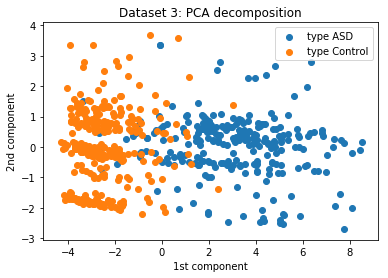

In [10]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

X_2d = pca.fit_transform(X_tr_rescaled);


for groups in [1, 2]:
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(groups)
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Dataset 3: PCA decomposition')
plt.show()

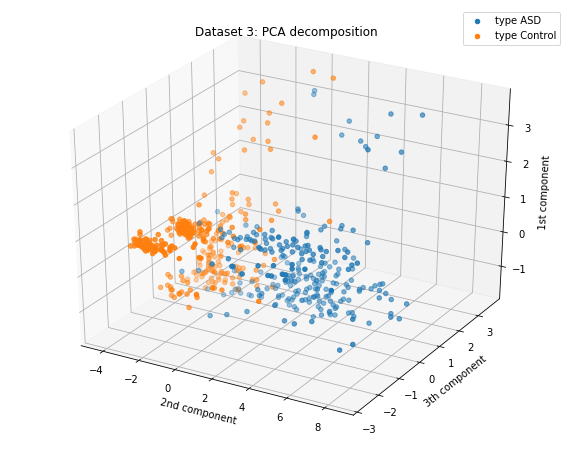

In [11]:
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=3)

X_3d = pca.fit_transform(X_tr_rescaled);

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

for groups in [1, 2]:
    
    idx = (y_tr == groups)
    
    if groups == 1:
        groups = 'ASD'
    if groups == 2:
        groups = 'Control'
    
    ax.scatter3D(
        X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2],
        label='type {}'.format(groups), marker='o'
    )
    
plt.legend()
ax.set_zlabel('1st component')
ax.set_xlabel('2nd component')
ax.set_ylabel('3th component')
plt.title('Dataset 3: PCA decomposition')

plt.show()

In [12]:
# Try to see how much component we need with PCA

# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to rescaled data
X_pca_rescaled = pca.fit_transform(X_tr_rescaled)

# Proportion of variance explained
pca.explained_variance_ratio_;

In [13]:
pve = pca.explained_variance_ratio_

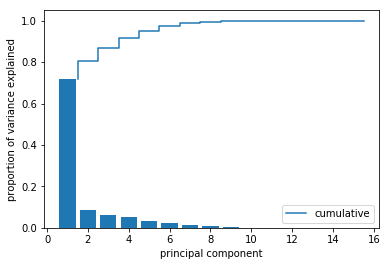

In [14]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor, pve)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [15]:
## Number of pca is the dataset to run with grid

n = len(X_tr[0])

list_pca = list(range(2,n))
list_pca.insert(0,None)

# Create a dict to store the results of my models
models_acc = dict()

## 3. Create a Baseline to evaluate my models

Since we are working here with a binary classification model I will use the 'most frequent' baseline.

In [16]:
from sklearn.dummy import DummyClassifier

# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit it
dummy.fit(None, y_tr)

# Compute test accuracy
baseline_accuracy = dummy.score(None, y_te)
print('Test accuracy baseline: {:.2f}%'.format(100*baseline_accuracy))
models_acc['baseline'] = 100*baseline_accuracy

Test accuracy baseline: 50.00%


In [23]:
# Function to plot my confusion matrix
# code taken at https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

---
---

# 4. Models 
<br>
<br>

## A. Decision tree:

I will try to fit and plot a first decision tree since they are the most easy models to read. <br>
I will then implement a GridSearchCV to tune the parameters of the Decision tree.

0.952054794520548


C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\preprocessing\data.py:765: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


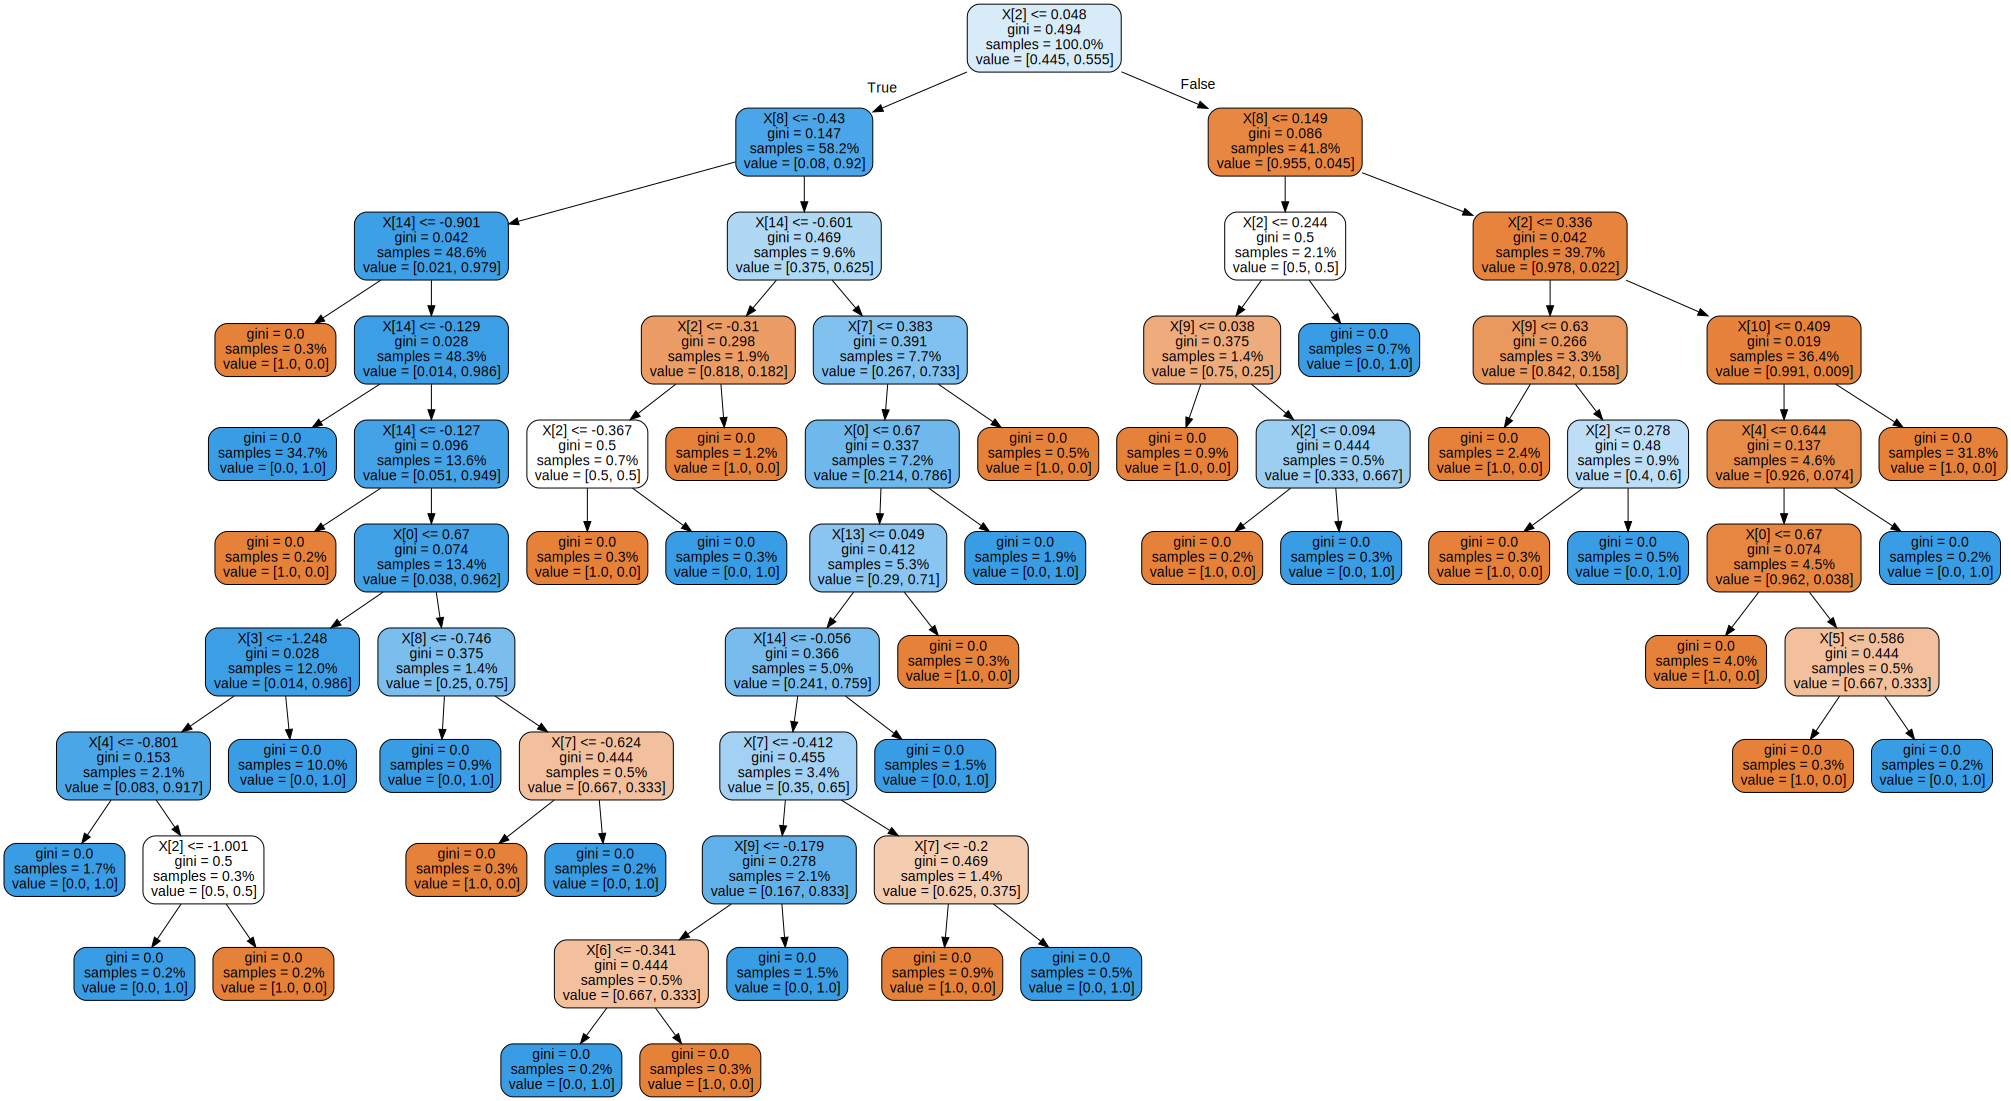

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz

scaler = StandardScaler()

# Transform X_tr
X_tr_rescaled = scaler.fit_transform(X_tr, y_tr)

# Create dt and fit it to tr
dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt.fit(X_tr_rescaled, y_tr)

# scale te
X_te_rescaled = scaler.transform(X_te, y_te)
# look at the score 
print(dt.score(X_te_rescaled, y_te))

# export decision tree
dot_data = export_graphviz(dt, out_file=None, filled=True,
                          rounded=True, proportion=True)


# Display decision tree
graphviz.Source(dot_data)

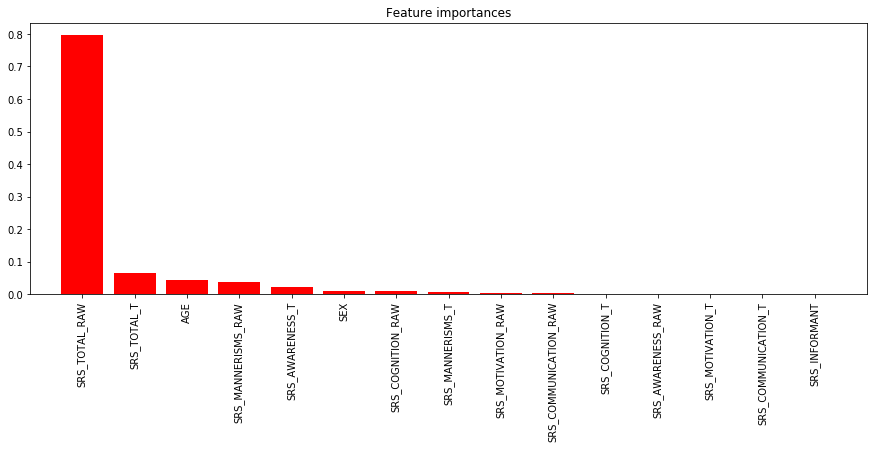

In [19]:
# look at the features importance  

features = dt.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_SRS.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

## Decision tree model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* tree : max depth ?

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion='gini',
                                    random_state=0))
])


param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'dt__max_depth':np.arange(1,30),
}

dt_gdcv = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

dt_gdcv.fit(X_tr, y_tr);

dt_results = pd.DataFrame({
    'scaler':dt_gdcv.cv_results_['param_scaler'],
    'PCA': dt_gdcv.cv_results_['param_pca__n_components'],
    'tree_depth':dt_gdcv.cv_results_['param_dt__max_depth'],
    'mean_tr': dt_gdcv.cv_results_['mean_train_score'],
    'mean_te': dt_gdcv.cv_results_['mean_test_score'],
    'std_te': dt_gdcv.cv_results_['std_test_score']
})

dt_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 812 candidates, totalling 4060 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1607 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 4060 out of 4060 | elapsed:    7.3s finished


,scaler,PCA,tree_depth,mean_tr,mean_te,std_te
0,None,None,1,0.936857,0.931271,0.020142
18,None,10,1,0.936857,0.931271,0.020142
36,None,5,2,0.936857,0.931271,0.020142
42,None,8,2,0.936857,0.931271,0.020142
34,None,4,2,0.936857,0.931271,0.020142
32,None,3,2,0.936857,0.931271,0.020142
44,None,9,2,0.936857,0.931271,0.020142
30,None,2,2,0.936857,0.931271,0.020142
28,None,None,2,0.936857,0.931271,0.020142
46,None,10,2,0.936857,0.931271,0.020142


#### Classification report :
* PRECISION : How many times are we correct when we predict positive?
* RECALL : How many times do we predict positive when it is?
* F1 SCORE : The F1 score is a way to combine the precision and recall metrics into a single score.

Test accuracy decision tree model: 97.26%
              precision    recall  f1-score   support

           1       0.99      0.96      0.97        73
           2       0.96      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



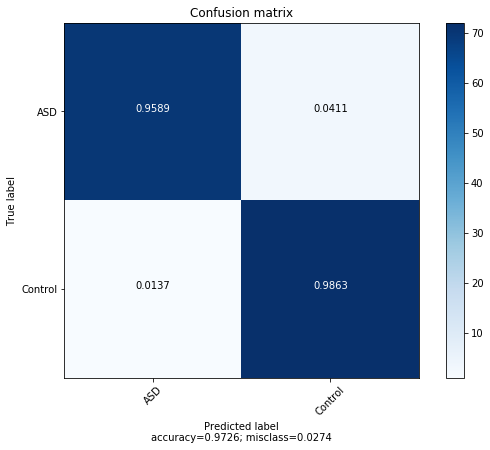

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy decision tree model: {:.2f}%'.format(100*dt_gdcv.score(X_te, y_te)))
models_acc['Decision tree'] = 100*dt_gdcv.score(X_te, y_te)

y_pred = dt_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

---

## B. Random forest model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_estimators : number of trees

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Pipeline with gridsearch of componenent and number of trees

random_f = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'rf__n_estimators':np.arange(1,501, 50),
}

rf_gdcv = GridSearchCV(random_f, param_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv.fit(X_tr, y_tr);

rf_results = pd.DataFrame({
    'scaler':rf_gdcv.cv_results_['param_scaler'],
    'PCA': rf_gdcv.cv_results_['param_pca__n_components'],
    'trees': rf_gdcv.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv.cv_results_['mean_test_score'],
    'std_te': rf_gdcv.cv_results_['std_test_score']
})

rf_results.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  4.6min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.0s finished


,scaler,PCA,trees,mean_tr,mean_te,std_te
2,None,None,51,1.00000,0.936426,0.014900
108,None,6,201,1.00000,0.931271,0.011969
116,None,6,401,1.00000,0.931271,0.011969
114,None,6,351,1.00000,0.931271,0.011969
112,None,6,301,1.00000,0.931271,0.011969
110,None,6,251,1.00000,0.931271,0.011969
106,None,6,151,1.00000,0.931271,0.011969
103,"StandardScaler(copy=True, with_mean=True, with...",6,51,1.00000,0.931271,0.019286
42,None,3,51,0.99957,0.931271,0.009513
118,None,6,451,1.00000,0.931271,0.011969


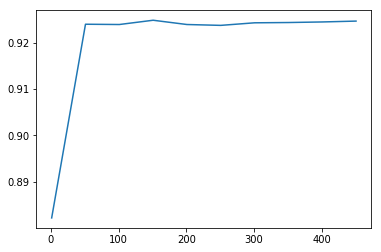

In [23]:
plot_data = rf_results.groupby('trees').mean()

plt.plot(plot_data.index, plot_data['mean_te'])
plt.show()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  51 out of  51 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  51 out of  51 | elapsed:    0.0s finished


Test accuracy random forest model: 96.58%

              precision    recall  f1-score   support

           1       0.99      0.95      0.97        73
           2       0.95      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



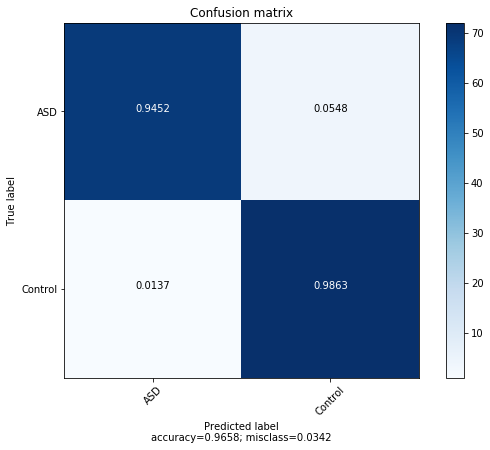

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv.score(X_te, y_te)))
print()

y_pred = rf_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine the search

In [25]:
print('Best score:', rf_gdcv.best_score_)
print('Best estimator:', rf_gdcv.best_estimator_)
print('Best params:', rf_gdcv.best_params_)

Best score: 0.936426116838488
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_node...stimators=51, n_jobs=-1,
            oob_score=False, random_state=9, verbose=1, warm_start=False))])
Best params: {'pca__n_components': None, 'rf__n_estimators': 51, 'scaler': None}


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 101 out of 101 | elapsed:    0.0s finished


   trees   mean_tr   mean_te    std_te
10   101  1.000000  0.924399  0.013470
0     51  0.999571  0.922680  0.015069
1     56  1.000000  0.922680  0.011788
5     76  1.000000  0.922680  0.011950
11   106  1.000000  0.922680  0.011950
28   191  1.000000  0.920962  0.010059
14   121  1.000000  0.920962  0.012473
13   116  1.000000  0.920962  0.012473
12   111  1.000000  0.920962  0.012473
15   126  1.000000  0.920962  0.011320

Test accuracy random forest model: 97.26%


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 101 out of 101 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s



              precision    recall  f1-score   support

           1       0.97      0.97      0.97        73
           2       0.97      0.97      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



[Parallel(n_jobs=8)]: Done 101 out of 101 | elapsed:    0.0s finished


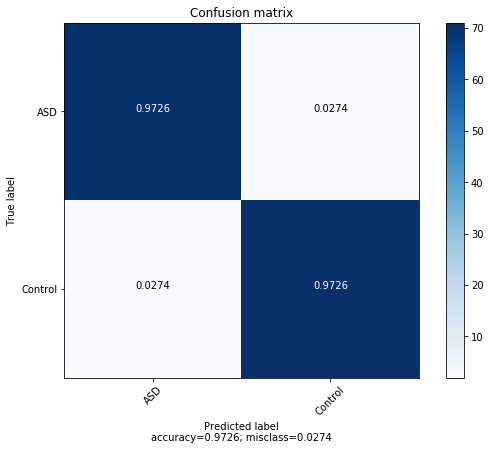

In [26]:
# Refine the search with the number of trees 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Pipeline with gridsearch of componenent and number of trees

random_f_2 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=)),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9
    ))
])

refined_grid={
#     'scaler':[None, StandardScaler()],
#     'pca__n_components':list_pca,
    'rf__n_estimators':np.arange(51,201, 5),
}

rf_gdcv_ref = GridSearchCV(random_f_2, refined_grid, cv=5, n_jobs=-1, verbose=2, return_train_score=True)

rf_gdcv_ref.fit(X_tr, y_tr);

rf_results_refined = pd.DataFrame({
#     'scaler':rf_gdcv_ref.cv_results_['param_scaler'],
#     'PCA': rf_gdcv_ref.cv_results_['param_pca__n_components'],
    'trees': rf_gdcv_ref.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gdcv_ref.cv_results_['mean_train_score'],
    'mean_te': rf_gdcv_ref.cv_results_['mean_test_score'],
    'std_te': rf_gdcv_ref.cv_results_['std_test_score']
})

print(rf_results_refined.sort_values(by='mean_te', ascending=False).head(10))
print()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv_ref.score(X_te, y_te)))
models_acc['Random forest'] = 100*rf_gdcv_ref.score(X_te, y_te)
print()

y_pred = rf_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

In [27]:
# Construct a forest model to see the importance of features 

forest = RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9,
                                  n_estimators=101)

forest.fit(X_tr, y_tr)

print('Test accuracy random forest model: {:.2f}%'.format(100*rf_gdcv_ref.score(X_te, y_te)))
print()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 101 out of 101 | elapsed:    0.0s finished


Test accuracy random forest model: 97.26%



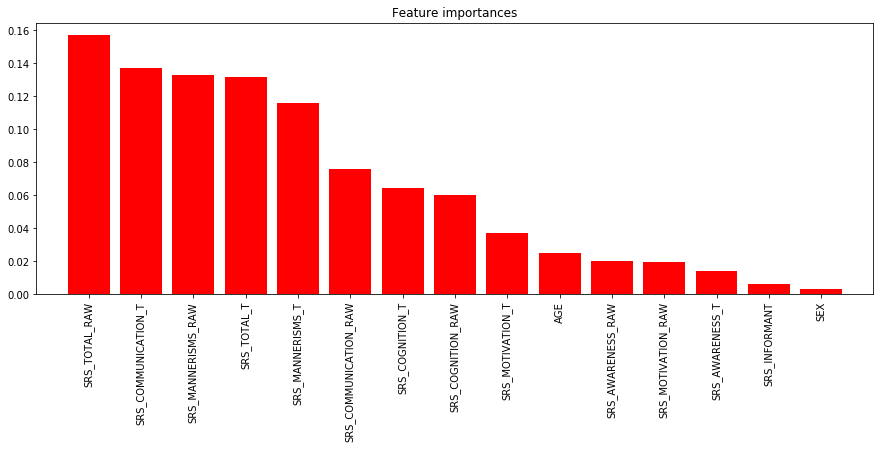

In [28]:
# Plot the most important features 

features = forest.feature_importances_
indices = np.argsort(features)[::-1]

names = ASD_SRS.drop(['DX_GROUP'], axis=1).copy()
names_ind = names.columns[indices]
names_ind

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), features[indices],
        color="r", align="center")
plt.xticks(range(X_tr.shape[1]), names_ind, rotation='vertical')
plt.xlim([-1, X_tr.shape[1]])
plt.show()

---

## C. kNN model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* n_neighbors : Number of neighbors to use 
* weights : weight function used in prediction
* p : Power parameter for the Minkowski metric

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

k_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_jobs=-1
    ))
])

param_grid={
    'scaler':[None, StandardScaler()],
    'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(1,101, 10),
    'knn__weights':['uniform', 'distance'],
    'knn__p':[1, 2]
}

k_nn_gdcv = GridSearchCV(k_nn, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv.fit(X_tr, y_tr);

knn_results = pd.DataFrame({
    'scaler':k_nn_gdcv.cv_results_['param_scaler'],
    'PCA': k_nn_gdcv.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv.cv_results_['param_knn__n_neighbors'],
    'p': k_nn_gdcv.cv_results_['param_knn__p'],
    'weights': k_nn_gdcv.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv.cv_results_['std_test_score']
})

knn_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  3.0min finished


,scaler,PCA,k,p,weights,mean_tr,mean_te,std_te
458,None,6,41,1,uniform,0.936858,0.934708,0.015749
352,None,9,31,1,uniform,0.933420,0.934708,0.011426
517,"StandardScaler(copy=True, with_mean=True, with...",7,41,2,uniform,0.938147,0.934708,0.018316
515,"StandardScaler(copy=True, with_mean=True, with...",6,41,2,uniform,0.936863,0.934708,0.018316
747,"StandardScaler(copy=True, with_mean=True, with...",10,61,2,uniform,0.935571,0.934708,0.019801


Test accuracy: 96.58%
              precision    recall  f1-score   support

           1       0.99      0.95      0.97        73
           2       0.95      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



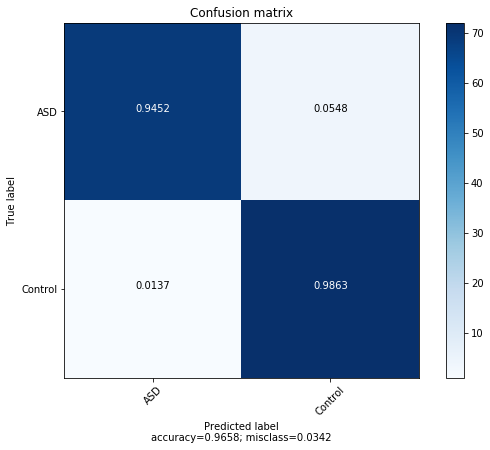

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv.score(X_te, y_te)))

y_pred = k_nn_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine my search 

In [31]:
print('Best score:', k_nn_gdcv.best_score_)
print('Best estimator:', k_nn_gdcv.best_estimator_)
print('Best params:', k_nn_gdcv.best_params_)

Best score: 0.9347079037800687
Best estimator: Pipeline(memory=None,
     steps=[('scaler', None), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
           weights='uniform'))])
Best params: {'knn__n_neighbors': 21, 'knn__p': 1, 'knn__weights': 'uniform', 'pca__n_components': None, 'scaler': None}


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


     k   mean_tr   mean_te    std_te
11  22  0.935998  0.938144  0.016461
10  21  0.936002  0.932990  0.016423
9   20  0.938147  0.932990  0.016508
15  26  0.934281  0.932990  0.009872
12  23  0.932992  0.932990  0.016508

Test accuracy: 97.26%
              precision    recall  f1-score   support

           1       0.99      0.96      0.97        73
           2       0.96      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



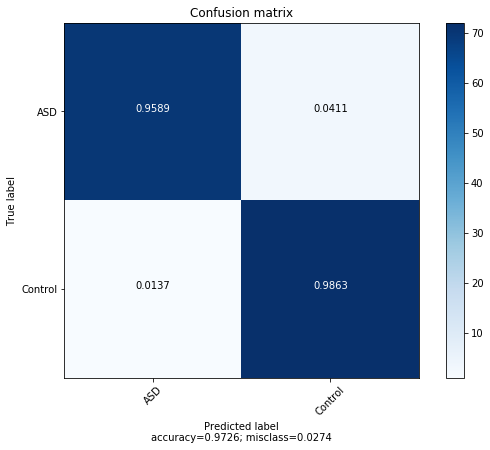

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Pipeline with gridsearch of componenent and number of k Neighboors 

knn_ref = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_jobs=-1,
                                 p=1,
                                 weights='uniform'
    ))
])

grid_refine={
#     'scaler':[None, StandardScaler()],
#     'pca__n_components':list_pca,
    'knn__n_neighbors':np.arange(11,31),
#     'knn__weights':['uniform', 'distance'],
#     'knn__p':[1, 2]
}

k_nn_gdcv_ref = GridSearchCV(knn_ref, grid_refine, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

k_nn_gdcv_ref.fit(X_tr, y_tr);

knn_results_refined = pd.DataFrame({
#     'scaler':k_nn_gdcv.cv_results_['param_scaler'],
#     'PCA': k_nn_gdcv.cv_results_['param_pca__n_components'],
    'k': k_nn_gdcv_ref.cv_results_['param_knn__n_neighbors'],
#     'p': k_nn_gdcv.cv_results_['param_knn__p'],
#     'weights': k_nn_gdcv.cv_results_['param_knn__weights'],
    'mean_tr': k_nn_gdcv_ref.cv_results_['mean_train_score'],
    'mean_te': k_nn_gdcv_ref.cv_results_['mean_test_score'],
    'std_te': k_nn_gdcv_ref.cv_results_['std_test_score']
})

print(knn_results_refined.sort_values(by='mean_te', ascending=False).head(5))
print()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*k_nn_gdcv_ref.score(X_te, y_te)))
models_acc['kNN'] = 100*k_nn_gdcv_ref.score(X_te, y_te)

y_pred = k_nn_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

---

## D. SVC model with GridsearchCV

Parameters:
* Scaler : None/scaler
* PCA reduction : n components
* C : Regularization parameter
* kernel : Specifies the kernel type to be used in the algorithm

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# Pipeline with gridsearch of components and number of k Neighboors 

SVC = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC(random_state=9))
])


param_grid = {
    'scaler': [None, StandardScaler()],
    'pca__n_components':list_pca,
    'svc__C':[0.01, 0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel':['rbf', 'linear'],
}

svc_gdcv = GridSearchCV(SVC, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv.fit(X_tr, y_tr);

svc_results = pd.DataFrame({
    'scale': svc_gdcv.cv_results_['param_scaler'],
    'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
    'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv.cv_results_['param_svc__C'],
    'gamma': svc_gdcv.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv.cv_results_['mean_test_score'],
    'std_te': svc_gdcv.cv_results_['std_test_score']
})

svc_results.sort_values(by='mean_te', ascending=False).head(5)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 367 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 769 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1756 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2825 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5309 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 6681 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 6985 out of 7000 | elapsed: 17.4min remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 7000 out of 7000 | elapsed: 18.0min finished
C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when t

,scale,PCA,kernel,C,gamma,mean_tr,mean_te,std_te
665,"StandardScaler(copy=True, with_mean=True, with...",7,linear,0.1,0.01,0.94287,0.939863,0.009128
663,"StandardScaler(copy=True, with_mean=True, with...",7,linear,0.1,0.1,0.94287,0.939863,0.009128
667,"StandardScaler(copy=True, with_mean=True, with...",7,linear,0.1,0.001,0.94287,0.939863,0.009128
669,"StandardScaler(copy=True, with_mean=True, with...",7,linear,0.1,0.0001,0.94287,0.939863,0.009128
661,"StandardScaler(copy=True, with_mean=True, with...",7,linear,0.1,1,0.94287,0.939863,0.009128


Test accuracy: 96.58%
              precision    recall  f1-score   support

           1       0.99      0.95      0.97        73
           2       0.95      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



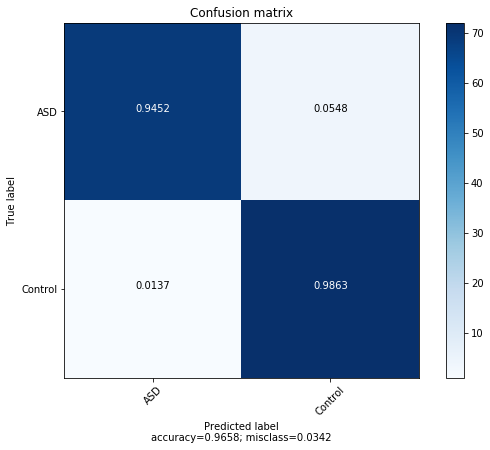

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Test accuracy: {:.2f}%'.format(100*svc_gdcv.score(X_te, y_te)))

y_pred = svc_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

### Refine my search with C 

In [35]:
print('Best score:', svc_gdcv.best_score_)
print('Best estimator:', svc_gdcv.best_estimator_)
print('Best params:', svc_gdcv.best_params_)

Best score: 0.9398625429553265
Best estimator: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'pca__n_components': 7, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}


Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    1.4s finished


       C gamma   mean_tr   mean_te    std_te
29  0.05   0.1  0.943729  0.943299  0.008415
41  0.05     2  0.943729  0.943299  0.008415
30  0.05   0.4  0.943729  0.943299  0.008415
31  0.05   0.5  0.943729  0.943299  0.008415
32  0.05   0.6  0.943729  0.943299  0.008415

Best score: 0.9432989690721649
Best estimator: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False))])
Best params: {'svc__C': 0.05, 'svc__gamma': 0.001}


Test accuracy: 95.89%

              precision    recall  f1-score   support

           1       0.99      0.93      0.96        73
           2       0.94      0

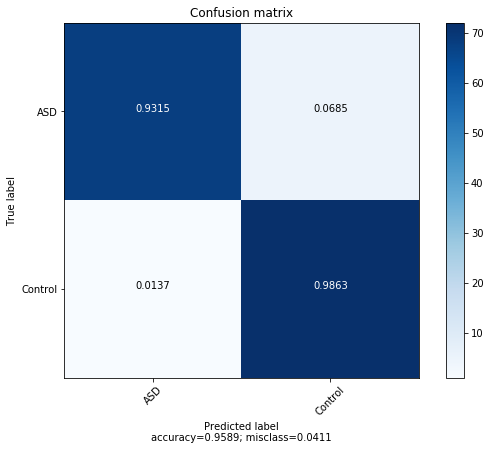

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SVC_ref = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=7)),
    ('svc', SVC(random_state=9,
               kernel='linear'))
])


grid_refined = {
#     'scaler': [None, StandardScaler()],
#     'pca__n_components':list_pca,
    'svc__C':[0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'svc__gamma':[0.001, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2], # If 10 then gridsearch with above 
#     'svc__kernel':['rbf', 'linear'],
}

svc_gdcv_refined = GridSearchCV(SVC_ref, grid_refined, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

svc_gdcv_refined.fit(X_tr, y_tr);

svc_results_refined = pd.DataFrame({
#     'scale': svc_gdcv.cv_results_['param_scaler'],
#     'PCA': svc_gdcv.cv_results_['param_pca__n_components'],
#     'kernel':svc_gdcv.cv_results_['param_svc__kernel'],
    'C': svc_gdcv_refined.cv_results_['param_svc__C'],
    'gamma': svc_gdcv_refined.cv_results_['param_svc__gamma'],
    'mean_tr': svc_gdcv_refined.cv_results_['mean_train_score'],
    'mean_te': svc_gdcv_refined.cv_results_['mean_test_score'],
    'std_te': svc_gdcv_refined.cv_results_['std_test_score']
})

print(svc_results_refined.sort_values(by='mean_te', ascending=False).head(5))
print()
print('Best score:', svc_gdcv_refined.best_score_)
print('Best estimator:', svc_gdcv_refined.best_estimator_)
print('Best params:', svc_gdcv_refined.best_params_)
print()

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print()
print('Test accuracy: {:.2f}%'.format(100*svc_gdcv_refined.score(X_te, y_te)))
models_acc['SVC'] = 100*svc_gdcv_refined.score(X_te, y_te)

y_pred = svc_gdcv_refined.predict(X_te)

print()
report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

<br>
<br>

--- 
--- 

# 5. Conclusion

In [37]:
models_df = pd.Series(models_acc).to_frame('Models')
models_df.sort_values('Models', ascending=False)

,Models
Decision tree,97.260274
Random forest,97.260274
kNN,97.260274
SVC,95.890411
baseline,50.000000


In [38]:
models_df.to_csv('df3_models.csv', index=False, encoding='utf-8')

Decision tree model : confusion matrix
              precision    recall  f1-score   support

           1       0.99      0.96      0.97        73
           2       0.96      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



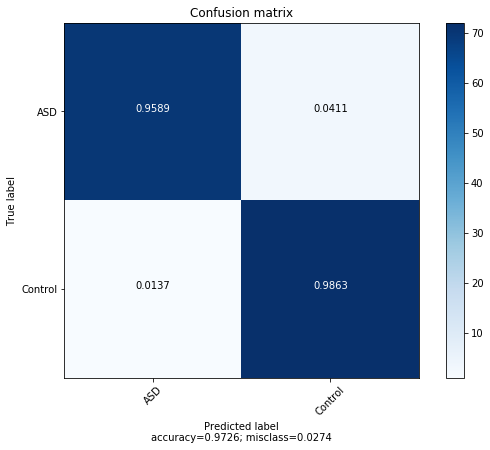

-------------------------------------------
Random forest model : confusion matrix
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        73
           2       0.97      0.97      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 101 out of 101 | elapsed:    0.0s finished


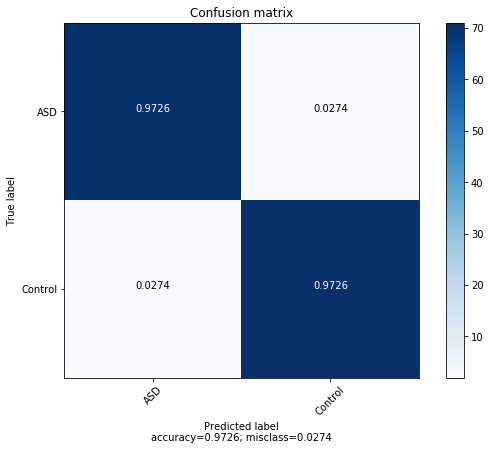

-------------------------------------------
kNN model : confusion matrix
              precision    recall  f1-score   support

           1       0.99      0.96      0.97        73
           2       0.96      0.99      0.97        73

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



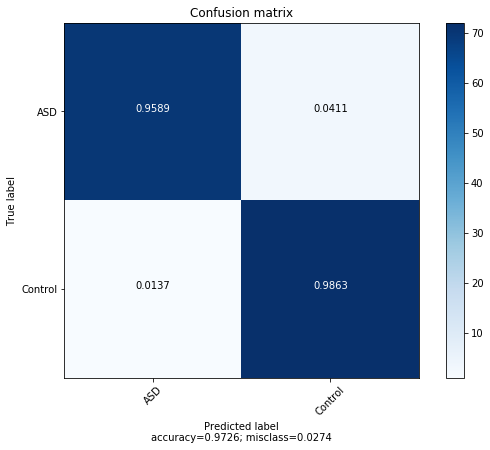

In [39]:
print('Decision tree model : confusion matrix')

y_pred = dt_gdcv.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

print('-------------------------------------------')

print('Random forest model : confusion matrix')

y_pred = rf_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

print('-------------------------------------------')

print('kNN model : confusion matrix')

y_pred = k_nn_gdcv_ref.predict(X_te)

report = classification_report(y_true=y_te, y_pred=y_pred)
print(report)

# Confusion matrix
matrix = confusion_matrix(y_true=y_te, y_pred=y_pred)

plot_confusion_matrix(matrix, ['ASD', 'Control'])

The 3 models have the same accuracy when predicting ASD. They also have the same F1 metric, and differ only by the precision and recall metrics. 
When thinking in term of clinical, we want to classify as much ASD patients as possible, so I will take the random forest model that have the best recall metrics for the ASD children (which mean we classify correctly ASD in 97% of the case, instead of 96% for the other models).